# German Credit Risk Classification

## Content
The main objective is to develop machine learning models that can distinguish between good and bad creditors, considering a cost matrix that asymmetrically penalizes classification errors.  
While this project does not aim to provide an exhaustive analysis, it offers valuable insights into credit risk classification. The findings highlight key trade-offs between accuracy and cost-sensitive evaluation, paving the way for further research and model refinement.

## Problem Description

The **German Credit** dataset contains **financial and demographic information** on **1,000 clients** and consists of **20 attributes** (7 numerical and 13 categorical), along with a **target variable** indicating whether a credit is classified as "good" or "bad."  
The provided cost matrix (extracted from *german.doc*) is as follows:

|                   | Predicted Good | Predicted Bad |
|-------------------|---------------|--------------|
| **Actual Good**   | 0             | 1            |
| **Actual Bad**    | 5             | 0            |

This means that misclassifying a bad creditor as good (cost 5) is significantly more penalized than misclassifying a good creditor as bad (cost 1).

## Workflow Overview
1. **Exploratory Data Analysis (EDA)**  
   - Understanding the dataset distribution.  
   - Identifying patterns and correlations.  
   - Evaluating class imbalance.

2. **Data Preprocessing**  
   - Encoding categorical variables.  
   - Normalizing numerical features.  
   - Managing class imbalance using different techniques.

3. **Models Development**  
   - Training and evaluating three models:  
     - **Random Forest**  
     - **Logistic Regression (Unbalanced)**  
     - **Logistic Regression (Balanced)**  
   - Comparing performance using both **accuracy-based metrics** and **cost-sensitive evaluation**.

4. **Results Interpretation**  
   - Analyzing model trade-offs between **accuracy** and **cost**.  
   - Selecting the best model based on business objectives.  





# Exploratory Data Analysis (EDA)

## Installing Required Library  
To access the **German Credit dataset** from the **UCI Machine Learning Repository**, we install the `ucimlrepo` package.

In [1]:
!pip install ucimlrepo

## Importing Required Libraries  
The necessary libraries for **data handling, visualization, and statistical analysis** are imported.

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')



## Loading and Preparing the Dataset  
The **German Credit** dataset is fetched from the **UCI Machine Learning Repository** and stored in a Pandas DataFrame.  
Additionally, attribute names are mapped to **more descriptive labels** for better readability.

In [3]:
# Fetch dataset from UCI repository
statlog_german_credit_data = fetch_ucirepo(id=144)

# Extract data and target as DataFrames
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Create a combined DataFrame with data and target
data = pd.concat([X, y], axis=1)

# Set Pandas display options for better output readability
pd.set_option("display.max_columns", 7)
pd.set_option("display.float_format", lambda x: f"{x:.1f}")

# Dictionary mapping original attribute names to descriptive names
attribute_names = {
    "Attribute1": "Status of existing checking account",
    "Attribute2": "Duration in months",
    "Attribute3": "Credit history",
    "Attribute4": "Purpose",
    "Attribute5": "Credit amount",
    "Attribute6": "Savings account/bonds",
    "Attribute7": "Present employment since",
    "Attribute8": "Installment rate (% of disposable income)",
    "Attribute9": "Personal status and sex",
    "Attribute10": "Other debtors/guarantors",
    "Attribute11": "Present residence since",
    "Attribute12": "Property",
    "Attribute13": "Age in years",
    "Attribute14": "Other installment plans",
    "Attribute15": "Housing",
    "Attribute16": "Number of existing credits at this bank",
    "Attribute17": "Job",
    "Attribute18": "Number of people being liable for maintenance",
    "Attribute19": "Telephone",
    "Attribute20": "Foreign worker",
    "class": "Credit rating"
}
data.rename(columns=attribute_names, inplace=True)
data.head()


,Status of existing checking account,Duration in months,Credit history,...,Telephone,Foreign worker,Credit rating
0,A11,6,A34,...,A192,A201,1
1,A12,48,A32,...,A191,A201,2
2,A14,12,A34,...,A191,A201,1
3,A11,42,A32,...,A191,A201,1
4,A11,24,A33,...,A191,A201,2


##Dataset Overview  
To understand the **structure and attributes** of the dataset, we examine its general information.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Status of existing checking account            1000 non-null   object
 1   Duration in months                             1000 non-null   int64 
 2   Credit history                                 1000 non-null   object
 3   Purpose                                        1000 non-null   object
 4   Credit amount                                  1000 non-null   int64 
 5   Savings account/bonds                          1000 non-null   object
 6   Present employment since                       1000 non-null   object
 7   Installment rate (% of disposable income)      1000 non-null   int64 
 8   Personal status and sex                        1000 non-null   object
 9   Other debtors/guarantors                       1000 non-null   o

## Statistical Summary of the Dataset  
The following summary provides **key descriptive statistics** for numerical variables, helping to identify **distributions, outliers, and potential preprocessing needs**.

In [5]:
data.describe()

,Duration in months,Credit amount,Installment rate (% of disposable income),...,Number of existing credits at this bank,Number of people being liable for maintenance,Credit rating
count,1000.0,1000.0,1000.0,...,1000.0,1000.0,1000.0
mean,20.9,3271.3,3.0,...,1.4,1.2,1.3
std,12.1,2822.7,1.1,...,0.6,0.4,0.5
min,4.0,250.0,1.0,...,1.0,1.0,1.0
25%,12.0,1365.5,2.0,...,1.0,1.0,1.0
50%,18.0,2319.5,3.0,...,1.0,1.0,1.0
75%,24.0,3972.2,4.0,...,2.0,1.0,2.0
max,72.0,18424.0,4.0,...,4.0,2.0,2.0


## Missing Values Analysis

In [6]:
data.isnull().sum()

,0
Status of existing checking account,0
Duration in months,0
Credit history,0
Purpose,0
Credit amount,0
Savings account/bonds,0
Present employment since,0
Installment rate (% of disposable income),0
Personal status and sex,0
Other debtors/guarantors,0



The dataset **does not contain any missing values**, ensuring that no imputation or removal of observations is required. This allows for a more straightforward preprocessing phase without concerns about data loss or bias introduction.


## Distribution of Numerical Attributes  
Understanding the distribution of numerical features helps identify patterns, outliers, and potential transformations needed for model optimization.


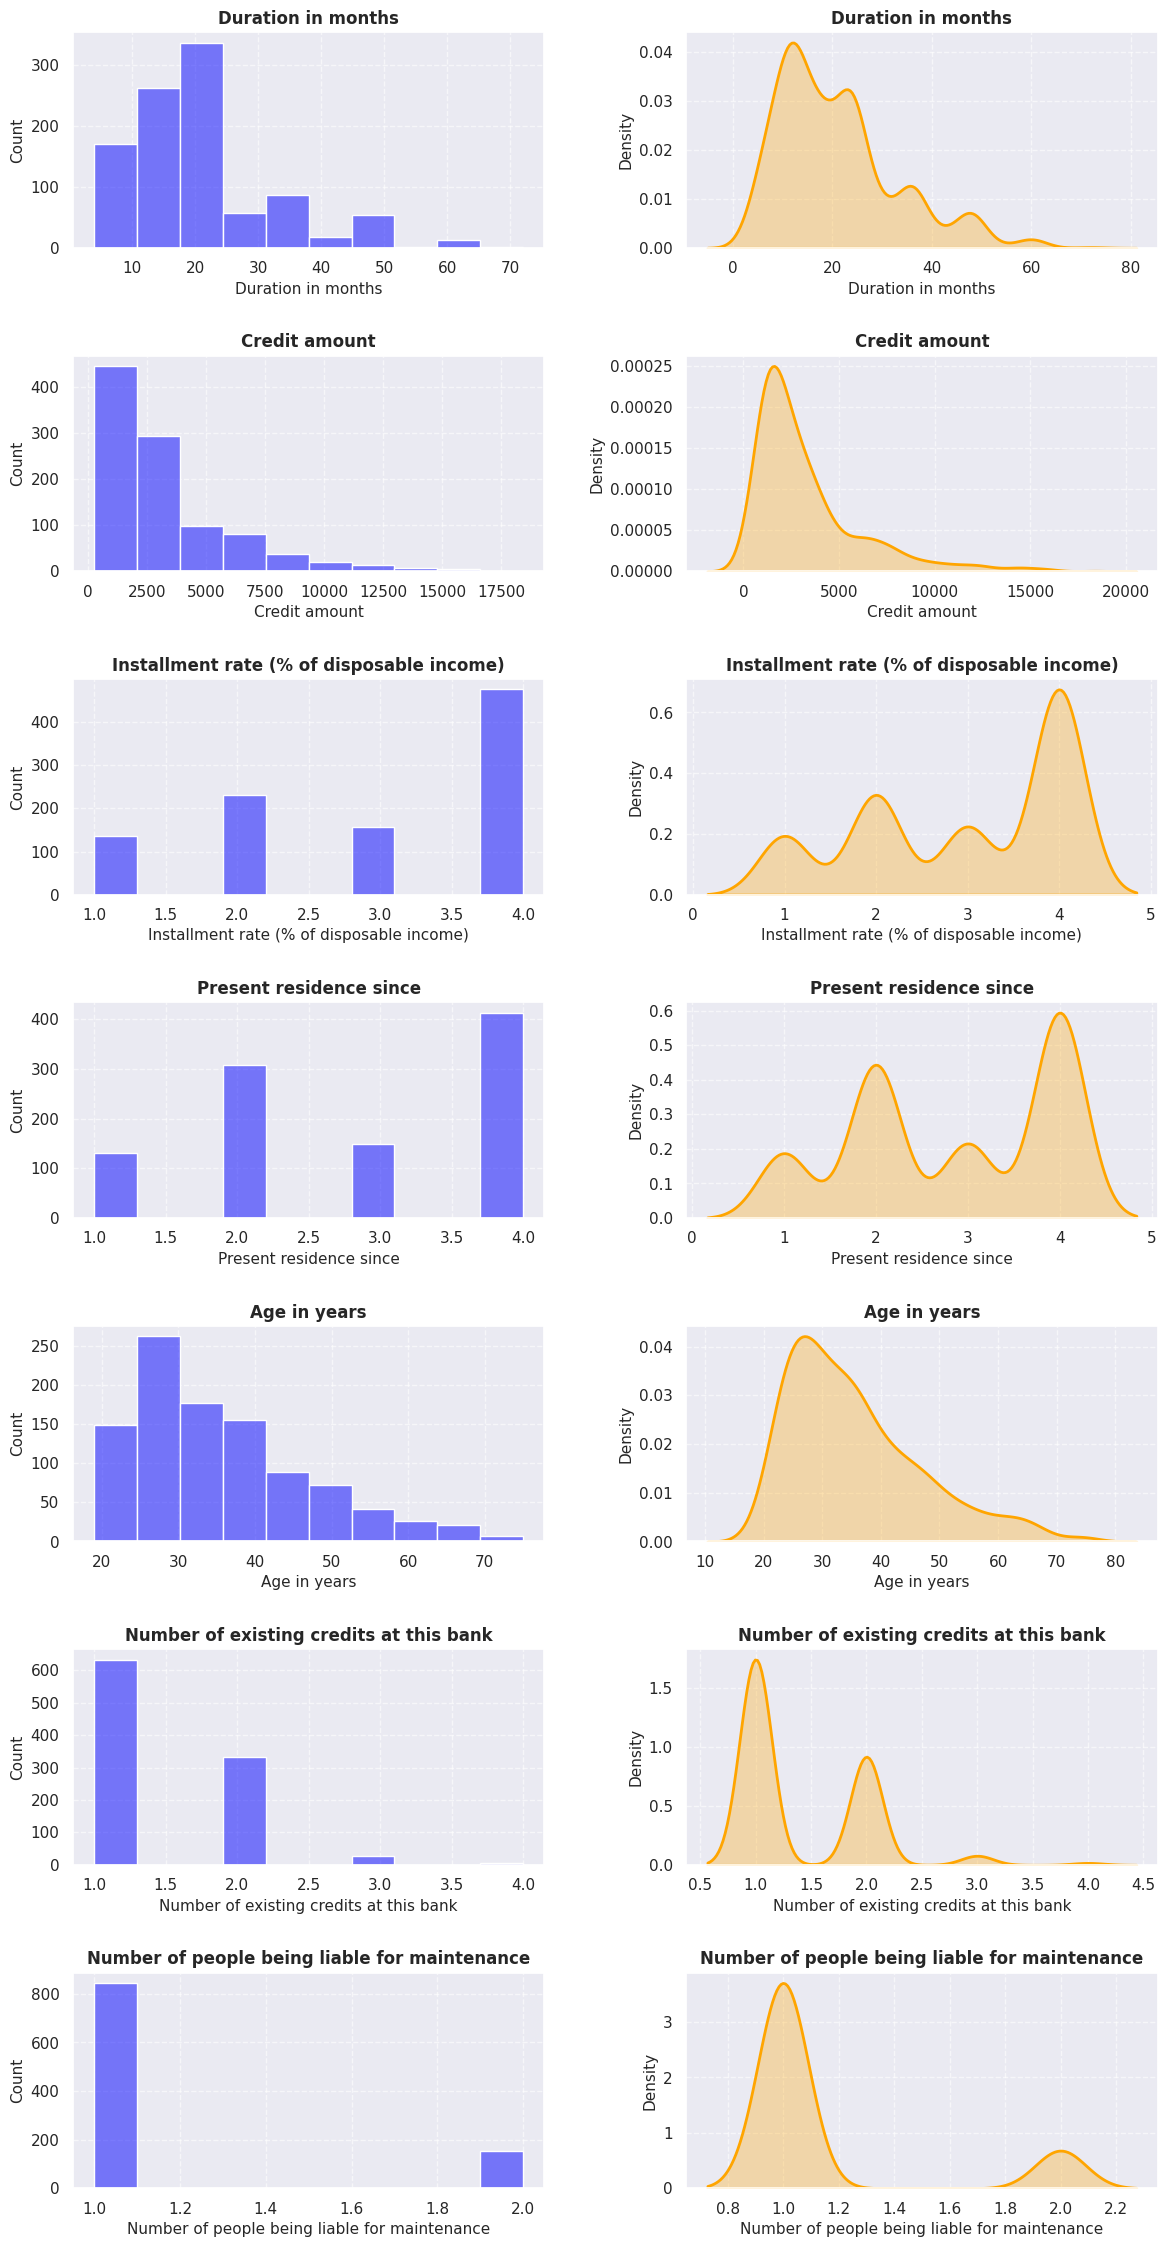

In [ ]:
# Set seaborn theme for consistency
sns.set_theme(style="darkgrid")

# Select numerical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Define grid layout (2 plots per variable: Histogram + KDE)
n_plots = len(num_cols)
n_cols_grid = 2  # Each row contains an Histogram + KDE
n_rows_grid = n_plots  # Each variable gets its own row

# Adjust figure size
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(14, 4 * n_rows_grid))

# Flatten axes array for easy iteration
axes = axes.reshape(n_rows_grid, n_cols_grid)

for i, col in enumerate(num_cols):
    # Histogram (left)
    sns.histplot(data[col], bins=10, ax=axes[i, 0], color="blue", alpha=0.5, stat="count")
    axes[i, 0].set_title(f"{col}", fontsize=12, fontweight="bold")
    axes[i, 0].set_xlabel(col, fontsize=11)
    axes[i, 0].set_ylabel("Count", fontsize=11)
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)

    # KDE (right)
    sns.kdeplot(data=data, x=col, ax=axes[i, 1], color="orange", lw=2, fill=True, alpha=0.3)
    axes[i, 1].set_title(f"{col}", fontsize=12, fontweight="bold")
    axes[i, 1].set_xlabel(col, fontsize=11)
    axes[i, 1].set_ylabel("Density", fontsize=11)
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)

# Adjust layout to avoid overlap
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


## Distribution of Categorical Attributes  
Analyzing categorical variables provides insights into class frequencies and potential feature engineering opportunities, ensuring an optimal representation for predictive modeling.


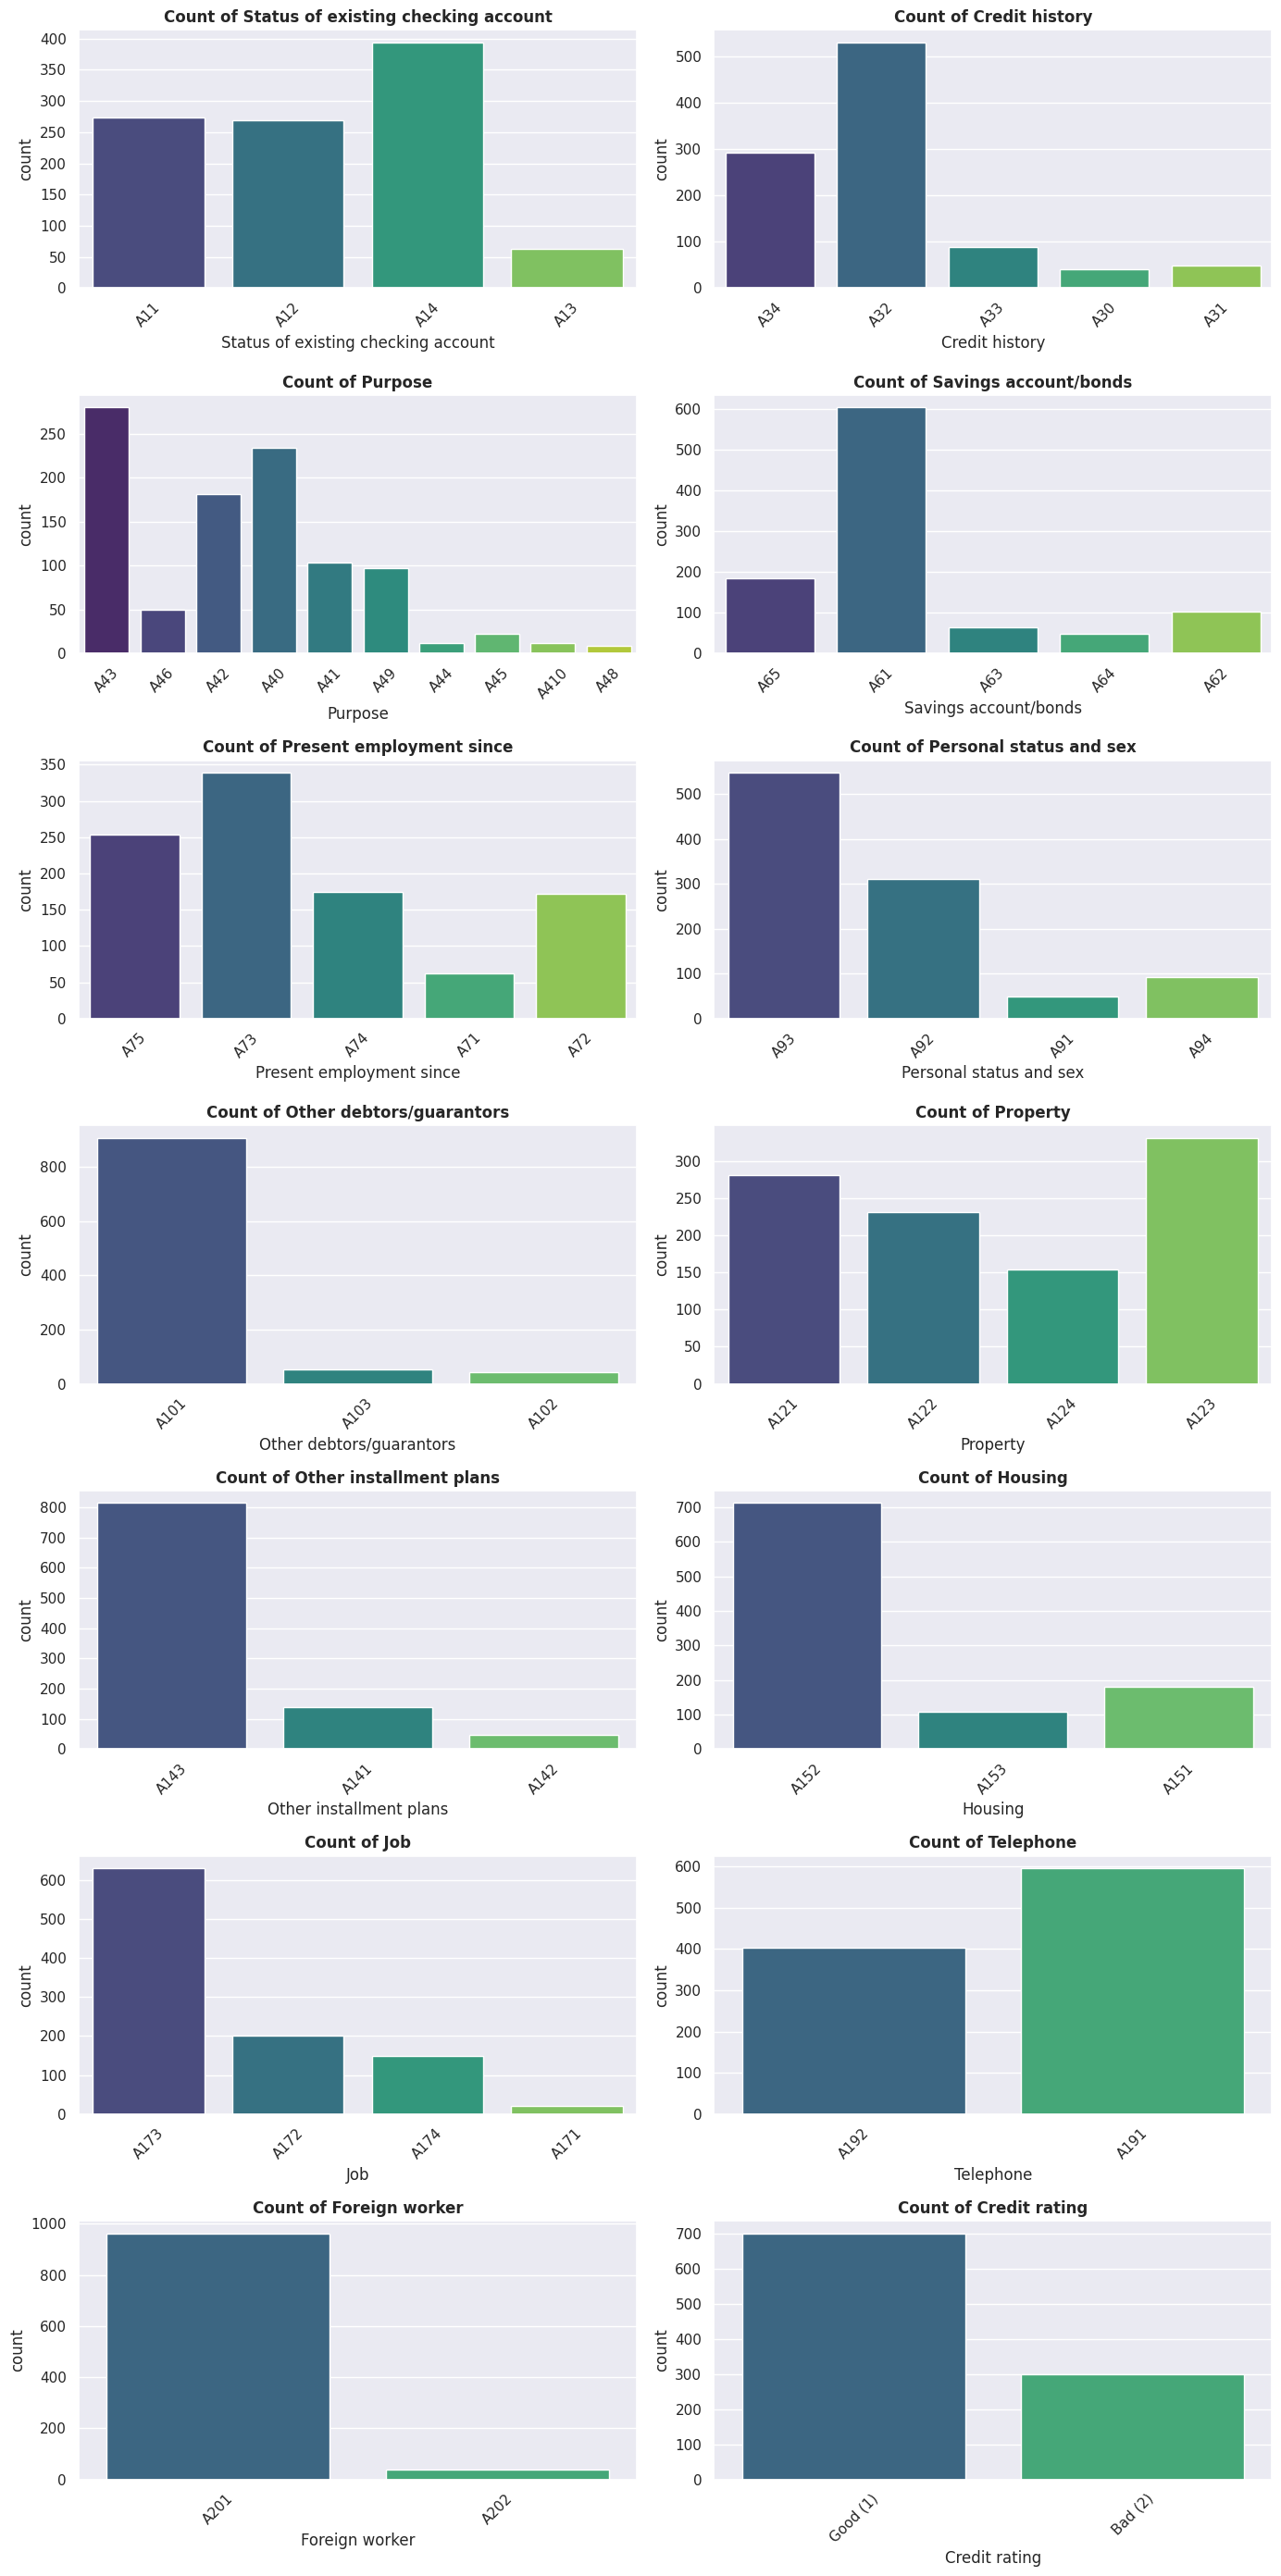

In [ ]:
# Set seaborn theme for consistency
sns.set_theme(style="darkgrid")

# Select categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Define grid layout
n_plots = len(cat_cols)
n_cols_grid = 2  # Number of plots per row
n_rows_grid = int(np.ceil(n_plots / n_cols_grid))

# Adjust figure size as needed (width, height)
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(14, 4 * n_rows_grid))

# Flatten axes array for easy iteration
axes = axes.flatten() if n_plots > 1 else [axes]

for i, col in enumerate(cat_cols):
    sns.countplot(x=data[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count of {col}",fontsize=12, fontweight="bold")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove any unused subplots if the total number isn't a multiple of n_cols_grid
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Distribution of the Target Variable  
Evaluating the distribution of the dependent variable is crucial for understanding dataset balance, potential biases, and the need for class imbalance handling.


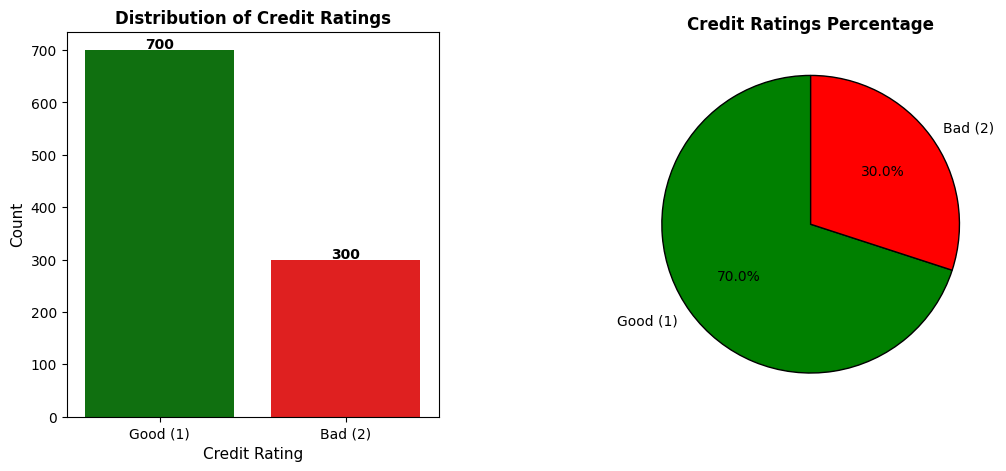

In [ ]:
# Define figure with 1 row and 2 columns (Histogram + Pie Chart)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Define colors for both plots
colors = ["green", "red"]

# Rename target values for better readability
data['Credit rating'] = data['Credit rating'].replace({1: "Good (1)", 2: "Bad (2)"})

# Plot histogram on the left
sns.countplot(x=data['Credit rating'], palette=colors, ax=axes[0])

# Enhance title and axis labels
axes[0].set_title("Distribution of Credit Ratings", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Credit Rating", fontsize=11)
axes[0].set_ylabel("Count", fontsize=11)

# Add value labels above bars
for p in axes[0].patches:
    axes[0].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height() + 3),
        ha='center', fontsize=10, fontweight="bold"
    )

# Plot pie chart on the right
credit_counts = data['Credit rating'].value_counts()
axes[1].pie(
    credit_counts,
    labels=credit_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"}
)

# Enhance pie chart title
axes[1].set_title("Credit Ratings Percentage", fontsize=12, fontweight="bold")

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.5)

plt.show()



### Class Imbalance Observation  
The dataset exhibits **a clear class imbalance**, with **700 out of 1,000 instances (70%)** classified as **Good Credit** and **300 out of 1,000 instances (30%)** classified as **Bad Credit**.  
This imbalance may affect model performance, particularly in terms of recall for the minority class. Appropriate techniques, such as class weighting or resampling, may be considered during preprocessing to mitigate its impact.


## Correlation Matrix Analysis  
Examining the correlation matrix provides insights into relationships between numerical features and the target variable. Identifying highly correlated features can help optimize feature selection and improve model performance.


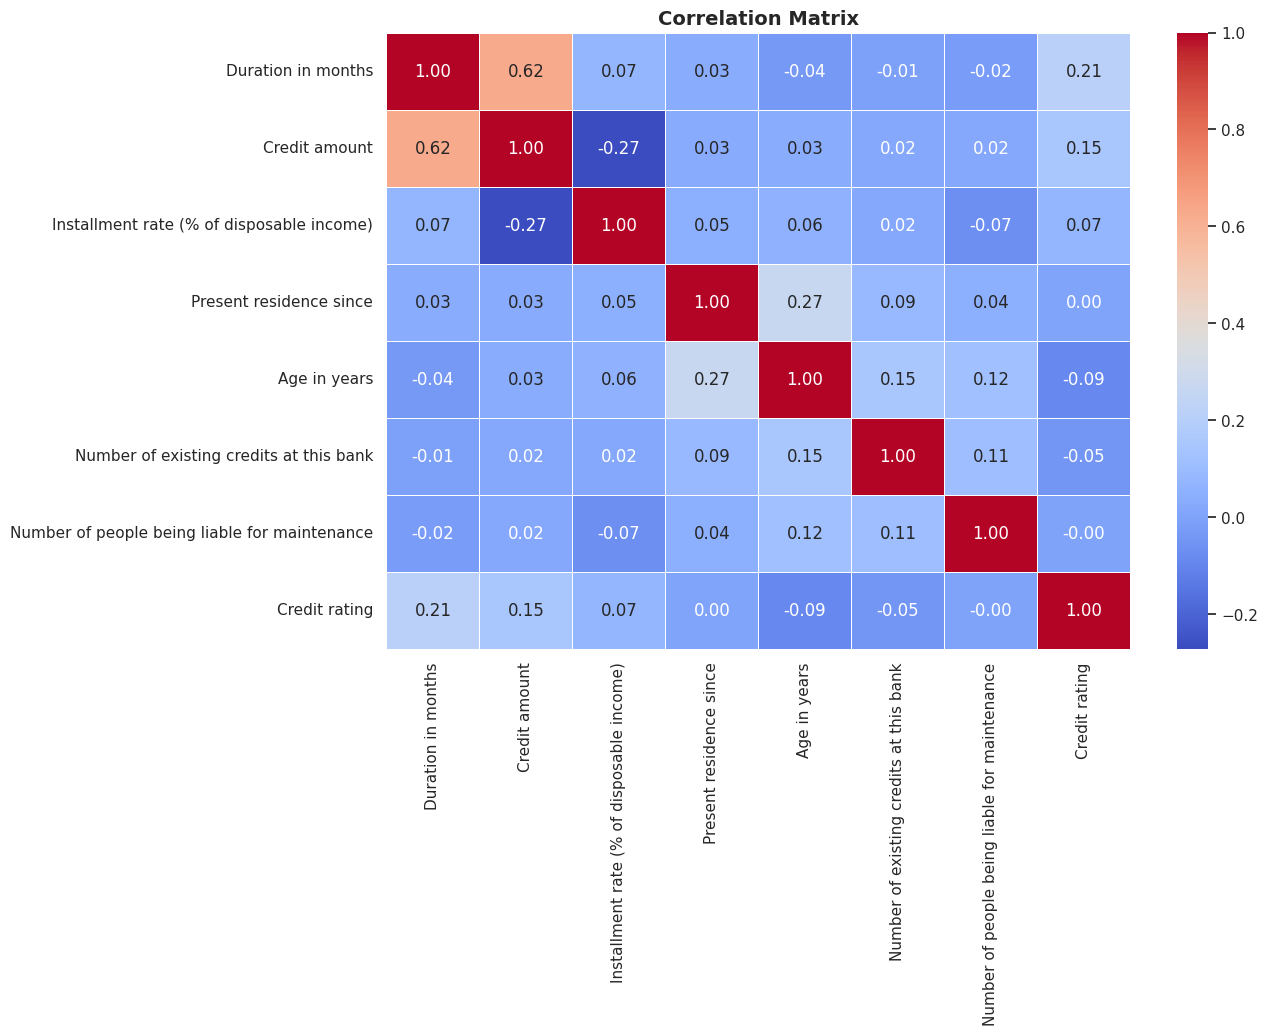

In [7]:
# Set seaborn theme for consistent styling
sns.set_theme(style="white")

# Select numeric columns for correlation
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[num_cols].corr()

# Define figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Enhance title
plt.title("Correlation Matrix", fontsize=14, fontweight="bold")

plt.show()



The attributes **"Present residence since"** and **"Number of people being liable for maintenance"** exhibit **zero correlation** with the target variable. Since they do not contribute to the predictive power of the model, they will be **removed during the preprocessing phase** to enhance model efficiency.


##Chi-Square Test

In [ ]:
# Perform the Chi-Square test for a categorical variable against the target
def chi_square_test(data, cat_col, target_col):
    """Performs the Chi-Square test between a categorical variable and the target."""

    # Create contingency table
    contingency_table = pd.crosstab(data[cat_col], data[target_col])

    # Display only the first 10 rows of the contingency table for readability
    print(f"\nContingency Table for {cat_col} (first 10 rows):")
    display(contingency_table.head(10))

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print test results
    print(f"\nChi-Squared Test for {cat_col}:")
    print(f" - Test Statistic: {chi2:.2f}")
    print(f" - Degrees of Freedom: {dof}")
    print(f" - P-value: {p:.4f}")

    # Check significance
    if p < 0.05:
        print(f" ✅ {cat_col} is **significantly associated** with {target_col} (p < 0.05).")
    else:
        print(f" ❌ {cat_col} is **NOT significantly associated** with {target_col} (p >= 0.05).")

# Apply Chi-Square test to all categorical variables
cat_attributes = data.select_dtypes(include=['object']).columns
for col in cat_attributes:
    chi_square_test(data, col, 'Credit rating')



Contingency Table for Status of existing checking account (first 10 rows):


Credit rating,Bad (2),Good (1)
Status of existing checking account,,
A11,135,139
A12,105,164
A13,14,49
A14,46,348



Chi-Squared Test for Status of existing checking account:
 - Test Statistic: 123.72
 - Degrees of Freedom: 3
 - P-value: 0.0000
 ✅ Status of existing checking account is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Credit history (first 10 rows):


Credit rating,Bad (2),Good (1)
Credit history,,
A30,25,15
A31,28,21
A32,169,361
A33,28,60
A34,50,243



Chi-Squared Test for Credit history:
 - Test Statistic: 61.69
 - Degrees of Freedom: 4
 - P-value: 0.0000
 ✅ Credit history is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Purpose (first 10 rows):


Credit rating,Bad (2),Good (1)
Purpose,,
A40,89,145
A41,17,86
A410,5,7
A42,58,123
A43,62,218
A44,4,8
A45,8,14
A46,22,28
A48,1,8



Chi-Squared Test for Purpose:
 - Test Statistic: 33.36
 - Degrees of Freedom: 9
 - P-value: 0.0001
 ✅ Purpose is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Savings account/bonds (first 10 rows):


Credit rating,Bad (2),Good (1)
Savings account/bonds,,
A61,217,386
A62,34,69
A63,11,52
A64,6,42
A65,32,151



Chi-Squared Test for Savings account/bonds:
 - Test Statistic: 36.10
 - Degrees of Freedom: 4
 - P-value: 0.0000
 ✅ Savings account/bonds is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Present employment since (first 10 rows):


Credit rating,Bad (2),Good (1)
Present employment since,,
A71,23,39
A72,70,102
A73,104,235
A74,39,135
A75,64,189



Chi-Squared Test for Present employment since:
 - Test Statistic: 18.37
 - Degrees of Freedom: 4
 - P-value: 0.0010
 ✅ Present employment since is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Personal status and sex (first 10 rows):


Credit rating,Bad (2),Good (1)
Personal status and sex,,
A91,20,30
A92,109,201
A93,146,402
A94,25,67



Chi-Squared Test for Personal status and sex:
 - Test Statistic: 9.61
 - Degrees of Freedom: 3
 - P-value: 0.0222
 ✅ Personal status and sex is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Other debtors/guarantors (first 10 rows):


Credit rating,Bad (2),Good (1)
Other debtors/guarantors,,
A101,272,635
A102,18,23
A103,10,42



Chi-Squared Test for Other debtors/guarantors:
 - Test Statistic: 6.65
 - Degrees of Freedom: 2
 - P-value: 0.0361
 ✅ Other debtors/guarantors is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Property (first 10 rows):


Credit rating,Bad (2),Good (1)
Property,,
A121,60,222
A122,71,161
A123,102,230
A124,67,87



Chi-Squared Test for Property:
 - Test Statistic: 23.72
 - Degrees of Freedom: 3
 - P-value: 0.0000
 ✅ Property is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Other installment plans (first 10 rows):


Credit rating,Bad (2),Good (1)
Other installment plans,,
A141,57,82
A142,19,28
A143,224,590



Chi-Squared Test for Other installment plans:
 - Test Statistic: 12.84
 - Degrees of Freedom: 2
 - P-value: 0.0016
 ✅ Other installment plans is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Housing (first 10 rows):


Credit rating,Bad (2),Good (1)
Housing,,
A151,70,109
A152,186,527
A153,44,64



Chi-Squared Test for Housing:
 - Test Statistic: 18.20
 - Degrees of Freedom: 2
 - P-value: 0.0001
 ✅ Housing is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Job (first 10 rows):


Credit rating,Bad (2),Good (1)
Job,,
A171,7,15
A172,56,144
A173,186,444
A174,51,97



Chi-Squared Test for Job:
 - Test Statistic: 1.89
 - Degrees of Freedom: 3
 - P-value: 0.5966
 ❌ Job is **NOT significantly associated** with Credit rating (p >= 0.05).

Contingency Table for Telephone (first 10 rows):


Credit rating,Bad (2),Good (1)
Telephone,,
A191,187,409
A192,113,291



Chi-Squared Test for Telephone:
 - Test Statistic: 1.17
 - Degrees of Freedom: 1
 - P-value: 0.2789
 ❌ Telephone is **NOT significantly associated** with Credit rating (p >= 0.05).

Contingency Table for Foreign worker (first 10 rows):


Credit rating,Bad (2),Good (1)
Foreign worker,,
A201,296,667
A202,4,33



Chi-Squared Test for Foreign worker:
 - Test Statistic: 5.82
 - Degrees of Freedom: 1
 - P-value: 0.0158
 ✅ Foreign worker is **significantly associated** with Credit rating (p < 0.05).

Contingency Table for Credit rating (first 10 rows):


Credit rating,Bad (2),Good (1)
Credit rating,,
Bad (2),300,0
Good (1),0,700



Chi-Squared Test for Credit rating:
 - Test Statistic: 995.24
 - Degrees of Freedom: 1
 - P-value: 0.0000
 ✅ Credit rating is **significantly associated** with Credit rating (p < 0.05).


### Chi-Square Test Results and Feature Selection  
The attributes **"Job"** and **"Telephone"** fail the **Chi-Square test**, indicating no statistically significant relationship with the target variable.

- **"Telephone"** will be **removed** during preprocessing, as it does not provide useful predictive information.  
- **"Job"** will be **retained**, despite failing the test, for the following reasons:  
  - It is **conceptually relevant** to credit risk classification.  
  - The category **A171 ("Unemployed/Unskilled - Non-Resident")** is **underrepresented in the dataset**, which may have influenced the test result.  

Thus, while "Telephone" is eliminated, "Job" remains a valuable feature for model training.


# Data Preprocessing

In [8]:
print('Before preprocessing')
data.head()

Before preprocessing


,Status of existing checking account,Duration in months,Credit history,...,Telephone,Foreign worker,Credit rating
0,A11,6,A34,...,A192,A201,1
1,A12,48,A32,...,A191,A201,2
2,A14,12,A34,...,A191,A201,1
3,A11,42,A32,...,A191,A201,1
4,A11,24,A33,...,A191,A201,2


In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

# Dictionary for mapping original categorical values to meaningful numbers
mapping_dict = {
    "Status of existing checking account": {"A11": -1, "A12": 1, "A13": 2, "A14": 0},
    "Credit history": {"A30": 2, "A31": 1.5, "A32": 1, "A33": -1, "A34": -2},
    "Savings account/bonds": {"A61": 0, "A62": 1, "A63": 2, "A64": 3, "A65": -1},
    "Present employment since": {"A71": -1, "A72": 0, "A73": 1, "A74": 2, "A75": 3}
}

# Columns to be one-hot encoded
one_hot_cols = ["Purpose", "Personal status and sex", "Other debtors/guarantors",
                "Property", "Other installment plans", "Housing", "Job"]

# Columns to be min-max scaled
min_max_cols = ["Duration in months", "Credit amount",
                "Installment rate (% of disposable income)", "Age in years"]

# Columns to apply label encoding
label_encode_cols = ["Foreign worker"]

# Columns to be removed
drop_cols = ["Present residence since", "Number of people being liable for maintenance", "Telephone"]


### --- APPLYING PREPROCESSING --- ###

# Apply categorical mapping
for col, mapping in mapping_dict.items():
    data[col] = data[col].map(mapping)

# Apply One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None, dtype=int)
for col in one_hot_cols:
    encoded = encoder.fit_transform(data[[col]])
    categories = encoder.categories_[0]
    df_encoded = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in categories])
    data = data.drop(columns=[col]).reset_index(drop=True)  # Drop original column
    data = pd.concat([data, df_encoded], axis=1)  # Concatenate encoded columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
data[min_max_cols] = scaler.fit_transform(data[min_max_cols])

# Apply Label Encoding
encoder = LabelEncoder()
for col in label_encode_cols:
    data[col] = encoder.fit_transform(data[col])

# Drop unnecessary columns
data = data.drop(columns=drop_cols, errors="ignore")

# Convert target variable (Credit rating) to binary format (1 = Good, 0 = Bad)
data["Credit rating"] = data["Credit rating"].replace({1: 1, 2: 0})

# Display first 5 rows after processing
print("After preprocessing")
display(data.head())



After preprocessing


,Status of existing checking account,Duration in months,Credit history,Credit amount,Savings account/bonds,Present employment since,Installment rate (% of disposable income),Age in years,Number of existing credits at this bank,Foreign worker,Credit rating,Purpose_A40,Purpose_A41,Purpose_A410,Purpose_A42,Purpose_A43,Purpose_A44,Purpose_A45,Purpose_A46,Purpose_A48,Purpose_A49,Personal status and sex_A91,Personal status and sex_A92,Personal status and sex_A93,Personal status and sex_A94,Other debtors/guarantors_A101,Other debtors/guarantors_A102,Other debtors/guarantors_A103,Property_A121,Property_A122,Property_A123,Property_A124,Other installment plans_A141,Other installment plans_A142,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174
0,-1,0.03,-2.00,0.05,-1,3,1.00,0.86,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,1,0.65,1.00,0.31,0,1,0.33,0.05,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0,0.12,-2.00,0.10,0,2,0.33,0.54,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,-1,0.56,1.00,0.42,0,2,0.33,0.46,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,-1,0.29,-1.00,0.25,0,1,0.67,0.61,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


# Models Development

##  Importing Machine Learning Models and Evaluation Metrics  
The required **classification models** (Logistic Regression and Random Forest) and **performance evaluation metrics** are imported to assess model accuracy, AUC-ROC, and classification quality.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

## Splitting the Dataset and Defining the Cost Matrix  
The dataset is split into **training (70%) and testing (30%) sets**, ensuring that the class distribution is maintained (**stratification**).  
Additionally, a **cost matrix** is defined to reflect the **asymmetrical penalty for classification errors**.

In [18]:
# Split dataset into training and test sets
X = data.drop(columns=["Credit rating"])
y = data["Credit rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define cost matrix
cost_matrix = np.array([[0, 5],
                        [1, 0]])

## Logistic Regression


Logistic Regression (Balanced):
Confusion Matrix:
[[ 55  35]
 [ 67 143]]

Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.45      0.61      0.52        90
    Good (1)       0.80      0.68      0.74       210

    accuracy                           0.66       300
   macro avg       0.63      0.65      0.63       300
weighted avg       0.70      0.66      0.67       300


Total Cost: 242
AUC-ROC: 0.69

Logistic Regression (Unbalanced):
Confusion Matrix:
[[ 34  56]
 [ 28 182]]

Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.55      0.38      0.45        90
    Good (1)       0.76      0.87      0.81       210

    accuracy                           0.72       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.70      0.72      0.70       300


Total Cost: 308
AUC-ROC: 0.70


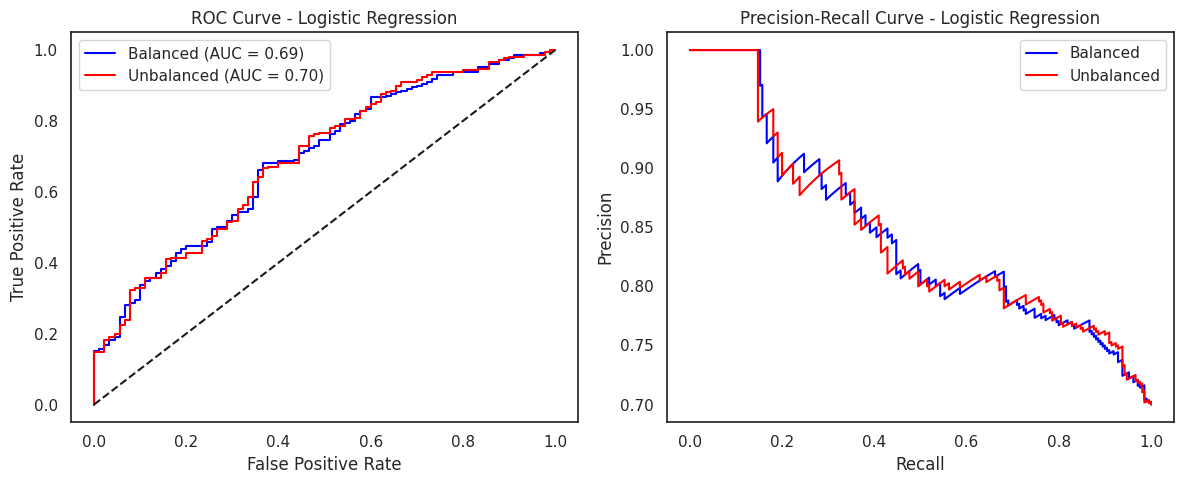

In [14]:
# Train and evaluate Logistic Regression models (with and without balanced class weights)
def train_evaluate_logistic_model(X_train, X_test, y_train, y_test, cost_matrix, balanced=True):
    """
    Trains and evaluates a logistic regression model.
    If balanced=True, uses class_weight="balanced".
    Returns predictions, probabilities, and computed cost.
    """
    weight_option = "balanced" if balanced else None
    model = LogisticRegression(random_state=42, max_iter=1000, class_weight=weight_option)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute confusion matrix & cost
    cm = confusion_matrix(y_test, y_pred)
    total_cost = np.sum(cost_matrix * cm)

    # Compute AUC-ROC
    auc = roc_auc_score(y_test, y_prob)

    # Print Evaluation Metrics
    title = "Logistic Regression (Balanced)" if balanced else "Logistic Regression (Unbalanced)"
    print(f"\n{title}:")
    print("Confusion Matrix:")
    print(cm)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Bad (0)", "Good (1)"]))

    print(f"\nTotal Cost: {total_cost}")
    print(f"AUC-ROC: {auc:.2f}")

    return y_prob, auc, y_pred


# Train and evaluate both models
y_prob_bal, auc_bal, _ = train_evaluate_logistic_model(X_train, X_test, y_train, y_test, cost_matrix, balanced=True)
y_prob_unbal, auc_unbal, _ = train_evaluate_logistic_model(X_train, X_test, y_train, y_test, cost_matrix, balanced=False)

# Compute ROC curves
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_prob_bal)
fpr_unbal, tpr_unbal, _ = roc_curve(y_test, y_prob_unbal)

# Compute Precision-Recall curves
precision_bal, recall_bal, _ = precision_recall_curve(y_test, y_prob_bal)
precision_unbal, recall_unbal, _ = precision_recall_curve(y_test, y_prob_unbal)

# Plot ROC & Precision-Recall Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr_bal, tpr_bal, label=f'Balanced (AUC = {auc_bal:.2f})', color="blue")
axes[0].plot(fpr_unbal, tpr_unbal, label=f'Unbalanced (AUC = {auc_unbal:.2f})', color="red")
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Logistic Regression")
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall_bal, precision_bal, label="Balanced", color="blue")
axes[1].plot(recall_unbal, precision_unbal, label="Unbalanced", color="red")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve - Logistic Regression")
axes[1].legend()

plt.tight_layout()
plt.show()


## Random forest

Confusion Matrix:
[[ 33  57]
 [ 15 195]]

Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.69      0.37      0.48        90
    Good (1)       0.77      0.93      0.84       210

    accuracy                           0.76       300
   macro avg       0.73      0.65      0.66       300
weighted avg       0.75      0.76      0.73       300


Total Cost (Random Forest): 300

AUC-ROC: 0.76


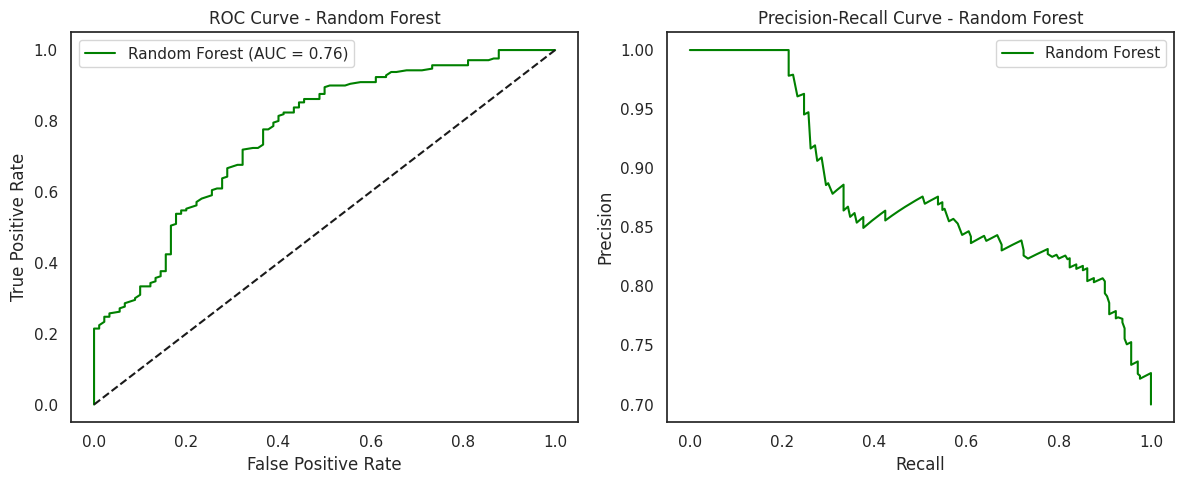

In [15]:
# Train and evaluate Random Forest model
def train_evaluate_random_forest(X_train, X_test, y_train, y_test, cost_matrix):
    """
    Trains and evaluates a Random Forest model.
    Returns predictions, probabilities, AUC, and computed cost.
    """
    # Train model
    model = RandomForestClassifier(n_estimators=500, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_rf = model.predict(X_test)
    y_prob_rf = model.predict_proba(X_test)[:, 1]  # Probability for positive class

    # Compute confusion matrix & cost
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    rf_cost = np.sum(cost_matrix * cm_rf)

    # Compute AUC-ROC
    auc_rf = roc_auc_score(y_test, y_prob_rf)

    # Print Evaluation Metrics
    print("Confusion Matrix:")
    print(cm_rf)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf, target_names=["Bad (0)", "Good (1)"]))

    print(f"\nTotal Cost (Random Forest): {rf_cost}\n")
    print(f"AUC-ROC: {auc_rf:.2f}")

    return y_prob_rf, auc_rf, y_pred_rf




# Train and evaluate the model
y_prob_rf, auc_rf, y_pred_rf = train_evaluate_random_forest(X_train, X_test, y_train, y_test, cost_matrix)

# Compute ROC and Precision-Recall curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# Plot ROC & Precision-Recall Curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color="green")
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve - Random Forest")
axes[0].legend()

# Precision-Recall Curve
axes[1].plot(recall_rf, precision_rf, label="Random Forest", color="green")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve - Random Forest")
axes[1].legend()

plt.tight_layout()
plt.show()


# Results Interpretation

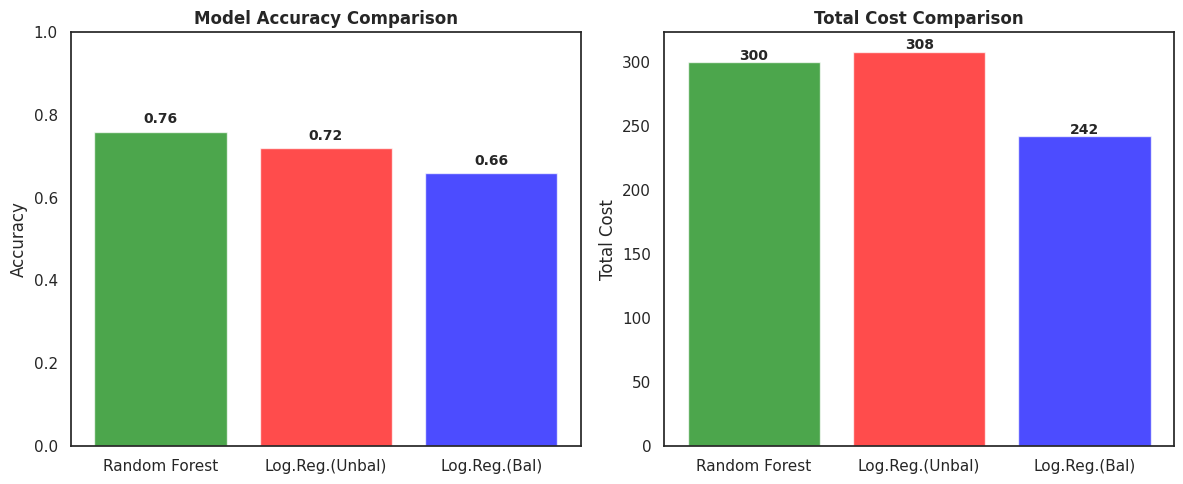

In [16]:
# Define models and their results
models = ["Random Forest", "Log.Reg.(Unbal)", "Log.Reg.(Bal)"]
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_prob_unbal >= 0.5),
              accuracy_score(y_test, y_prob_bal >= 0.5)]
costs = [np.sum(cost_matrix * confusion_matrix(y_test, y_pred_rf)),
         np.sum(cost_matrix * confusion_matrix(y_test, y_prob_unbal >= 0.5)),
         np.sum(cost_matrix * confusion_matrix(y_test, y_prob_bal >= 0.5))]

# Create figure with 2 side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy Bar Plot
axes[0].bar(models, accuracies, color=["green", "red", "blue"], alpha=0.7)
axes[0].set_ylim(0, 1)
axes[0].set_title("Model Accuracy Comparison", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Accuracy")
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.02, f"{acc:.2f}", ha="center", fontsize=10, fontweight="bold")

# Cost Bar Plot
axes[1].bar(models, costs, color=["green", "red", "blue"], alpha=0.7)
axes[1].set_title("Total Cost Comparison", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Total Cost")
for i, cost in enumerate(costs):
    axes[1].text(i, cost + 2, f"{cost}", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()


After conducting the analysis of **credit risk classification** using the **German Credit** dataset, we evaluated the performance of three Machine Learning models:

- **Random Forest**  
- **Logistic Regression (Unbalanced)**  
- **Logistic Regression (Balanced)**  

The main objective was not only to **maximize accuracy**, but also to **minimize the total cost** resulting from classification errors, based on the given cost matrix.

---

## Model Comparison  
The two comparison charts highlight a **trade-off** between accuracy and total cost.

### **1. Accuracy**  
- The **Random Forest** model achieved the **highest accuracy**, outperforming both logistic regression models.  
- The **Balanced Logistic Regression** improved recall for the minority class compared to the unbalanced version, but at the cost of lower overall accuracy.  

### **2. Total Cost**  
- The **Balanced Logistic Regression** achieved the **lowest total cost**, as it prioritized identifying bad creditors correctly, reducing false negatives.  
- **Random Forest**, despite having the highest accuracy, resulted in a higher cost, likely due to a greater number of **false positives (bad creditors classified as good)**.  
- The **Unbalanced Logistic Regression** had the **highest cost**, demonstrating the importance of handling class imbalance in this dataset.

---

## Final Considerations  
1. **If the goal is to minimize classification costs**, the **Balanced Logistic Regression** is the best choice, as it optimizes recall for bad creditors, reducing financial risk.  

2. **If the goal is to achieve the highest overall accuracy**, the **Random Forest** model is preferable, even though it leads to higher costs.  

3. **The Unbalanced Logistic Regression is not recommended**, as it results in both **lower accuracy** and a **higher total cost**.  

---

## General Conclusion  
Based on this analysis, the choice of the best model **depends on the business priority**:

- **If minimizing financial risk is the priority → Choose Balanced Logistic Regression.**  
- **If the goal is to maximize classification accuracy → Choose Random Forest.**  

These results emphasize the importance of considering **not only traditional evaluation metrics (accuracy, AUC-ROC) but also the total cost of classification errors**, ensuring that the selected model aligns with business objectives.
